In [86]:
#4 Simulate more explanatory variables

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

x1 = pd.DataFrame(np.abs(np.random.normal(loc=100, scale=100, size = 10000)))
x2 = pd.DataFrame(np.random.randint(0,50,10000))
x3 = pd.DataFrame(np.abs(np.random.normal(loc=0, scale=2, size = 10000)))
e = pd.DataFrame(np.random.normal(loc=0, scale=50, size=10000))
y = 25 + 2*x1 + 0.5*x2 + 50*x3 + e
lista = [x1,x2,x3,y]

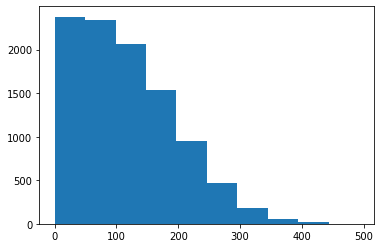

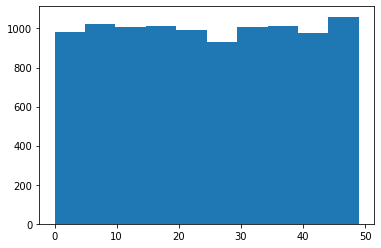

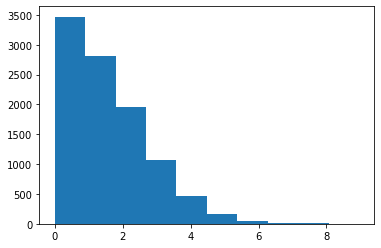

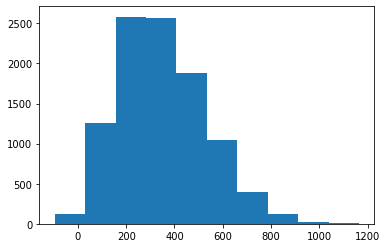

In [87]:
for i in range(len(lista)):
    plt.hist(lista[i])
    plt.show()



C:\Users\fredr\.virtualenvs\Maskininl-rning-Fredrik-Hegardt-mmrJtyaC\lib\site-packages\matplotlib\axes\_axes.py:6611: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\fredr\.virtualenvs\Maskininl-rning-Fredrik-Hegardt-mmrJtyaC\lib\site-packages\matplotlib\axes\_axes.py:6612: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


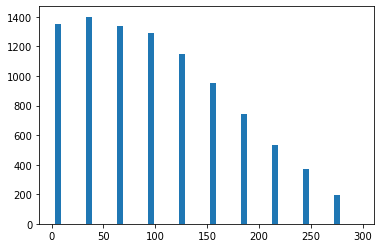

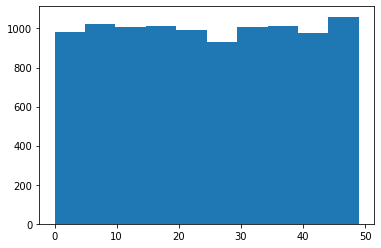

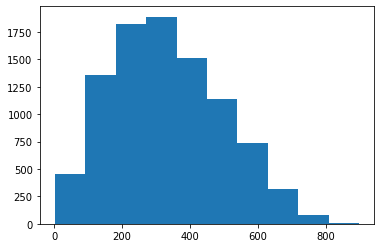

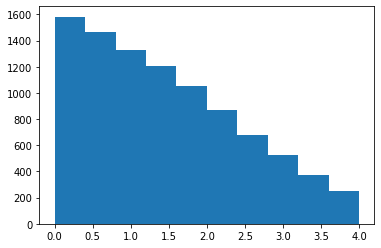

In [205]:
cleaner = (x1 < 300) & (y >0) & (x3 < 4)
x1 = x1[cleaner]
y = y[cleaner]
x3 = x3[cleaner]
cleaned_list = [x1,x2, y,x3]
for i in range(len(cleaned_list)):
    plt.hist(cleaned_list[i])
    plt.show()

In [225]:
# Train / Split / Test


x1["SMS"] = x2
x1["Surf"]= x3
x1["y"] = y
the_df = x1.dropna()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(the_df.iloc[:,0:3], the_df.iloc[:,3:3], test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1)



IndexError: index 0 is out of bounds for axis 0 with size 0

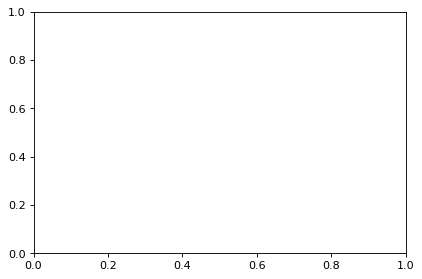

In [226]:

regression_fit = lambda X,y: np.linalg.inv(X.T @ X) @ X.T @ y
beta_hat = regression_fit(X_train, y_train)
predict = lambda X, weights: X @ weights
y_hat = predict(X_test.to_numpy(), beta_hat.to_numpy())
y_hat[:5,], y_test[:5]
x = np.linspace(0,10000)

fig, ax = plt.subplots(dpi=80)
#sns.scatterplot(x = clean_x, y = clean_y)
#sns.lineplot(x = clean_x, y = ground_truth, color = 'green')
sns.lineplot(x,beta_hat.iloc[0][0]+beta_hat.iloc[1][0] * x, color = 'red')

print(beta_hat)

plt.show()